## Connect with Google Drive

In [1]:
!pip install gdown

In [2]:
import gdown

url = "https://drive.google.com/uc?id=1RhakmYA0l99TEQLbHan9rfEyj12hPYL8"

output = 'video.mp4'

gdown.download(url, output)

Downloading...
From (original): https://drive.google.com/uc?id=1RhakmYA0l99TEQLbHan9rfEyj12hPYL8
From (redirected): https://drive.google.com/uc?id=1RhakmYA0l99TEQLbHan9rfEyj12hPYL8&confirm=t&uuid=91ef7543-82c6-46e2-95da-d985c078c282
To: /kaggle/working/video.mp4
100%|██████████| 664M/664M [00:02<00:00, 300MB/s] 


'video.mp4'

In [3]:
SOURCE_VIDEO_PATH = "/kaggle/working/video.mp4"

## Check GPU access

In [4]:
!nvidia-smi

Thu Feb 15 13:47:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Install YOLOv8

In [6]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5432.0/8062.4 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

In [8]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2


In [9]:
!pip install --upgrade jupyter-lsp packaging shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 701.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 13.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.5.post1
    Uninstalling Shapely-1.8.5.post1:
      Successfully uninstalled Shapely-1.8.5.post1
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: jupyter-lsp
    Found existing installation: jupyter-lsp 1.5.1
    Uninstalling jupyter-lsp-1.5.1:
      Successfully uninstalled jupyter-lsp-1.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 2

In [10]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="FMJblBkjpLkjWDc3Sr3N")
project = rf.workspace("fyp-fqnbg").project("socket_detection")
dataset = project.version(4).download("yolov8")


/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to socket_detection-4 in yolov8:: 100%|██████████| 1974/1974 [00:00<00:00, 6787.13it/s]


## Custom Training

In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

/kaggle/working
100%|███████████████████████████████████████| 83.7M/83.7M [00:00<00:00, 234MB/s]
New https://pypi.org/project/ultralytics/8.1.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/kaggle/working/datasets/socket_detection-4/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, sh

In [12]:
!ls {HOME}/runs/detect/train/

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
P_curve.png					   train_batch4860.jpg
R_curve.png					   train_batch4861.jpg
args.yaml					   train_batch4862.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1708005011.4495d25b8245.117.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


/kaggle/working


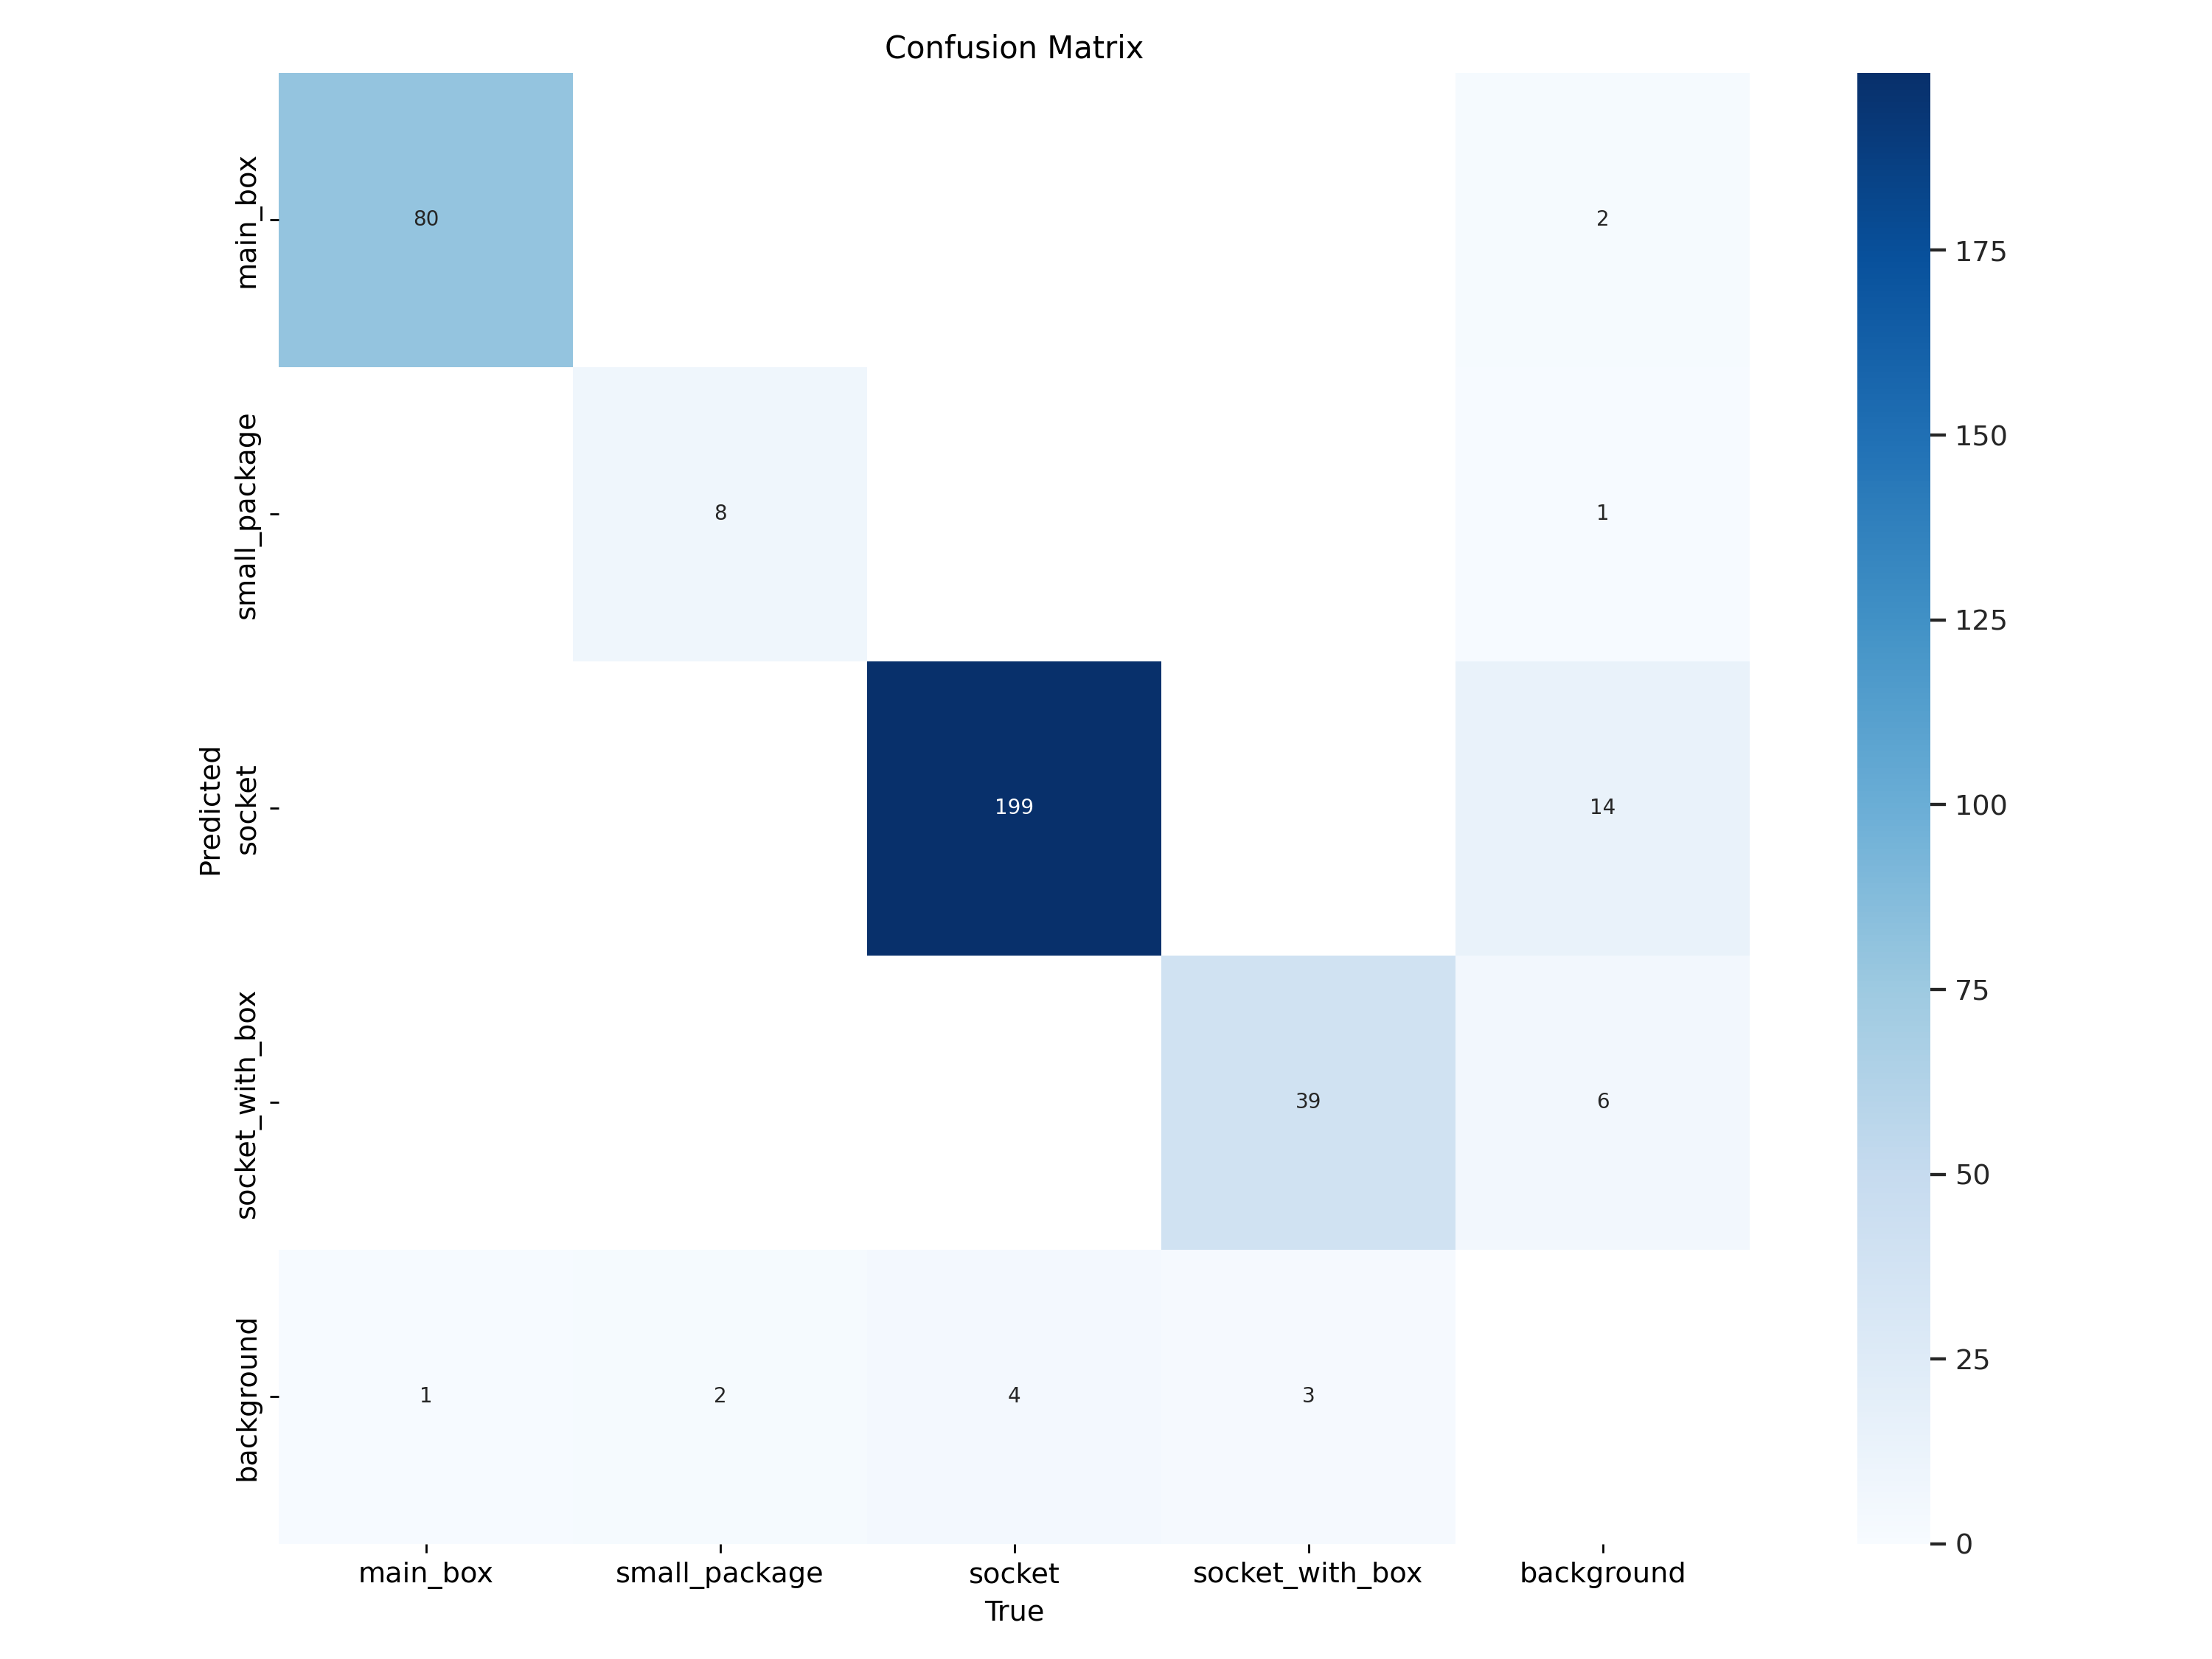

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


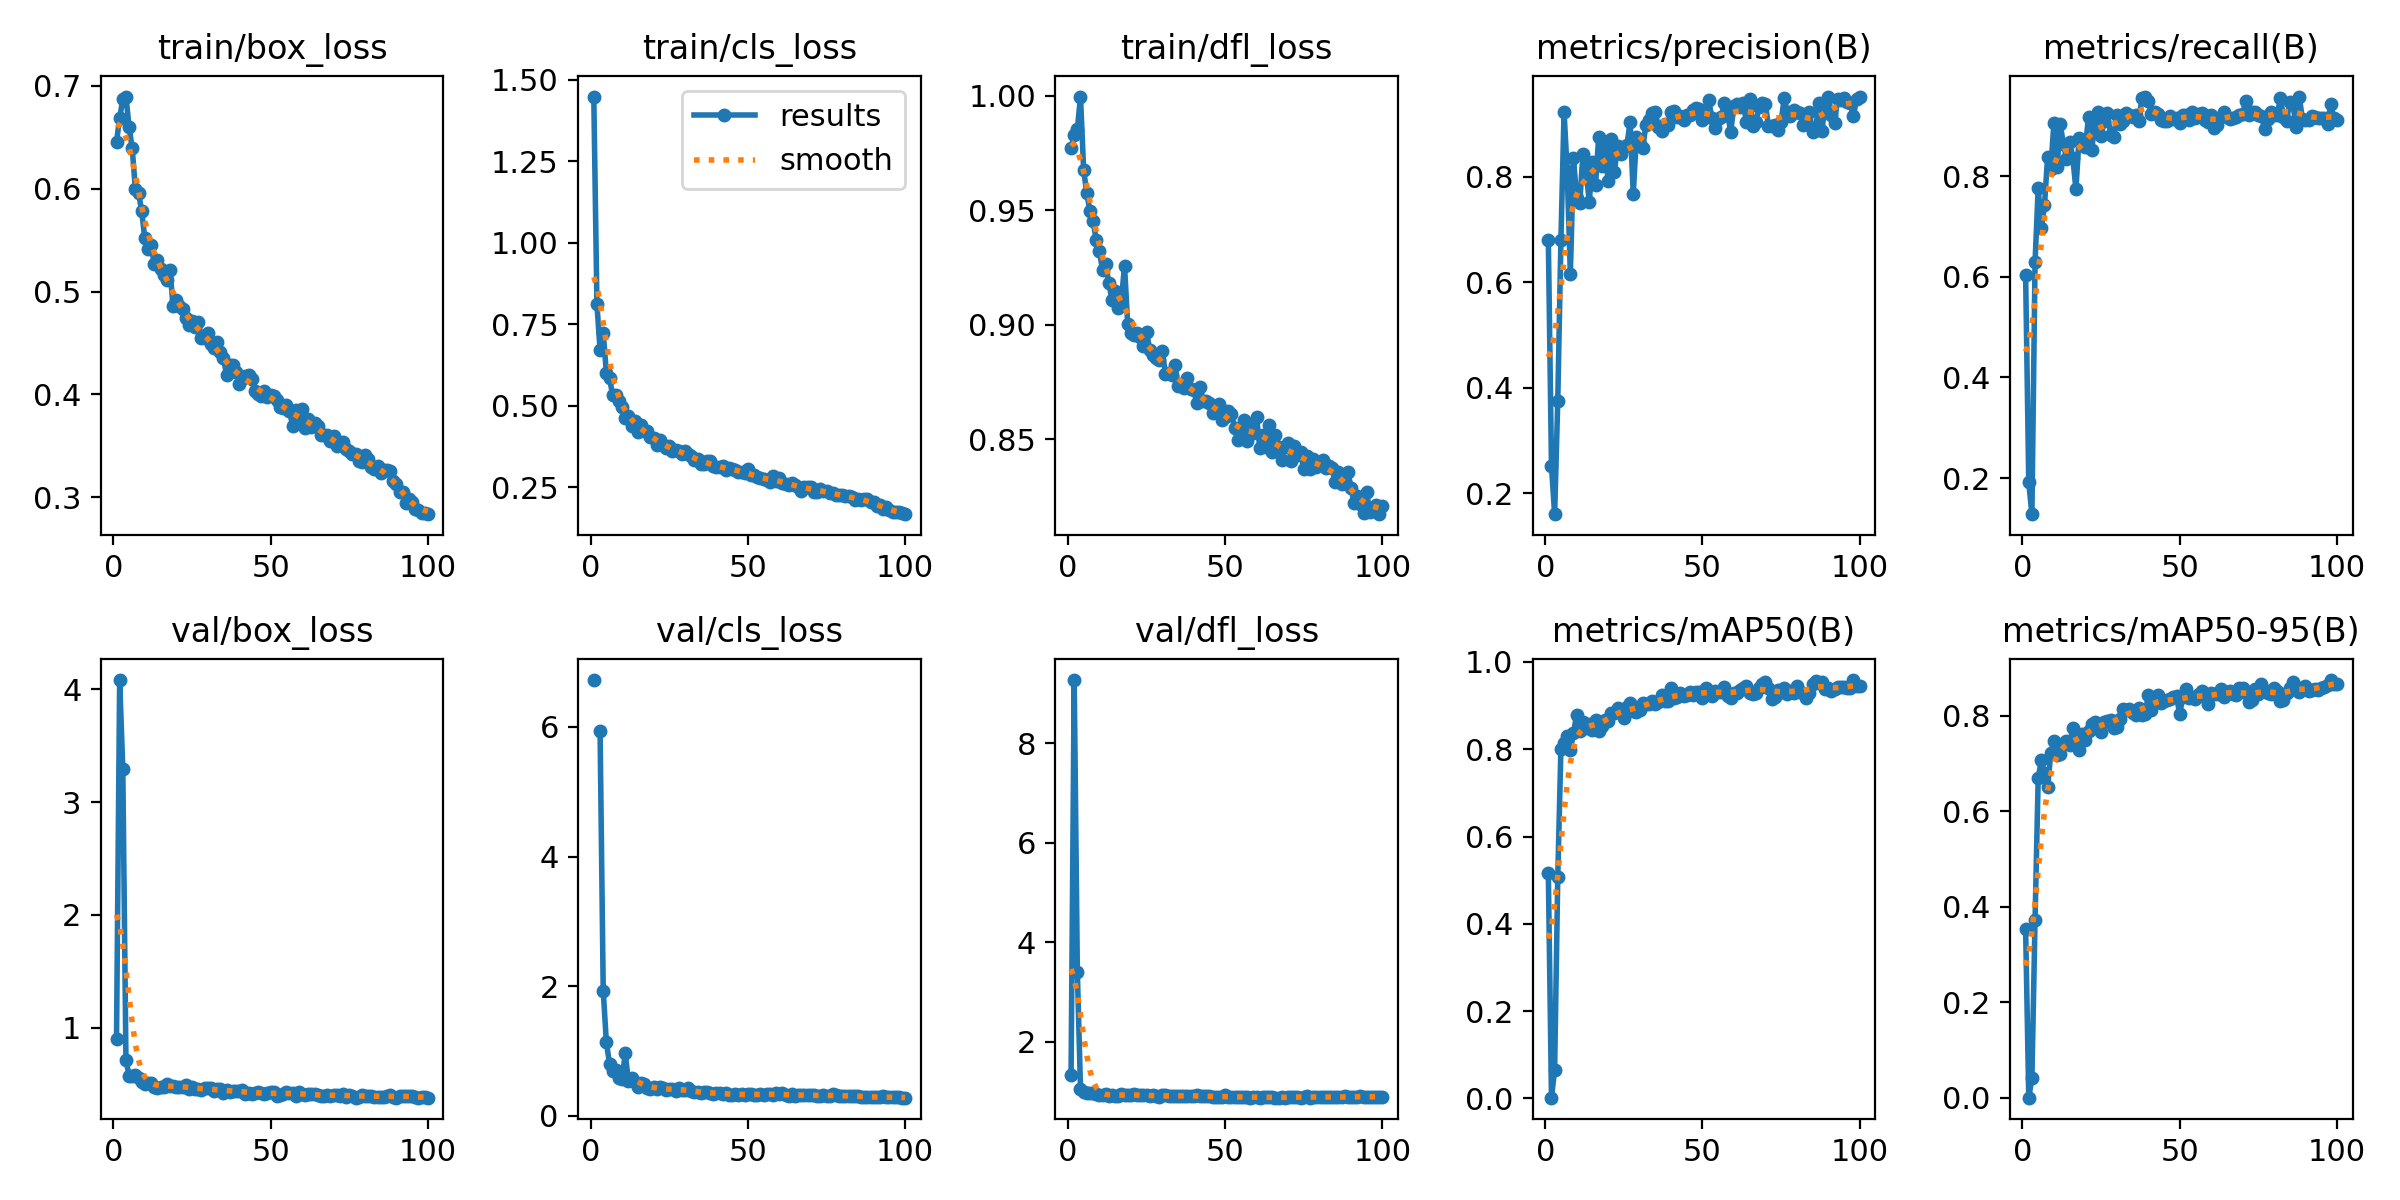

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


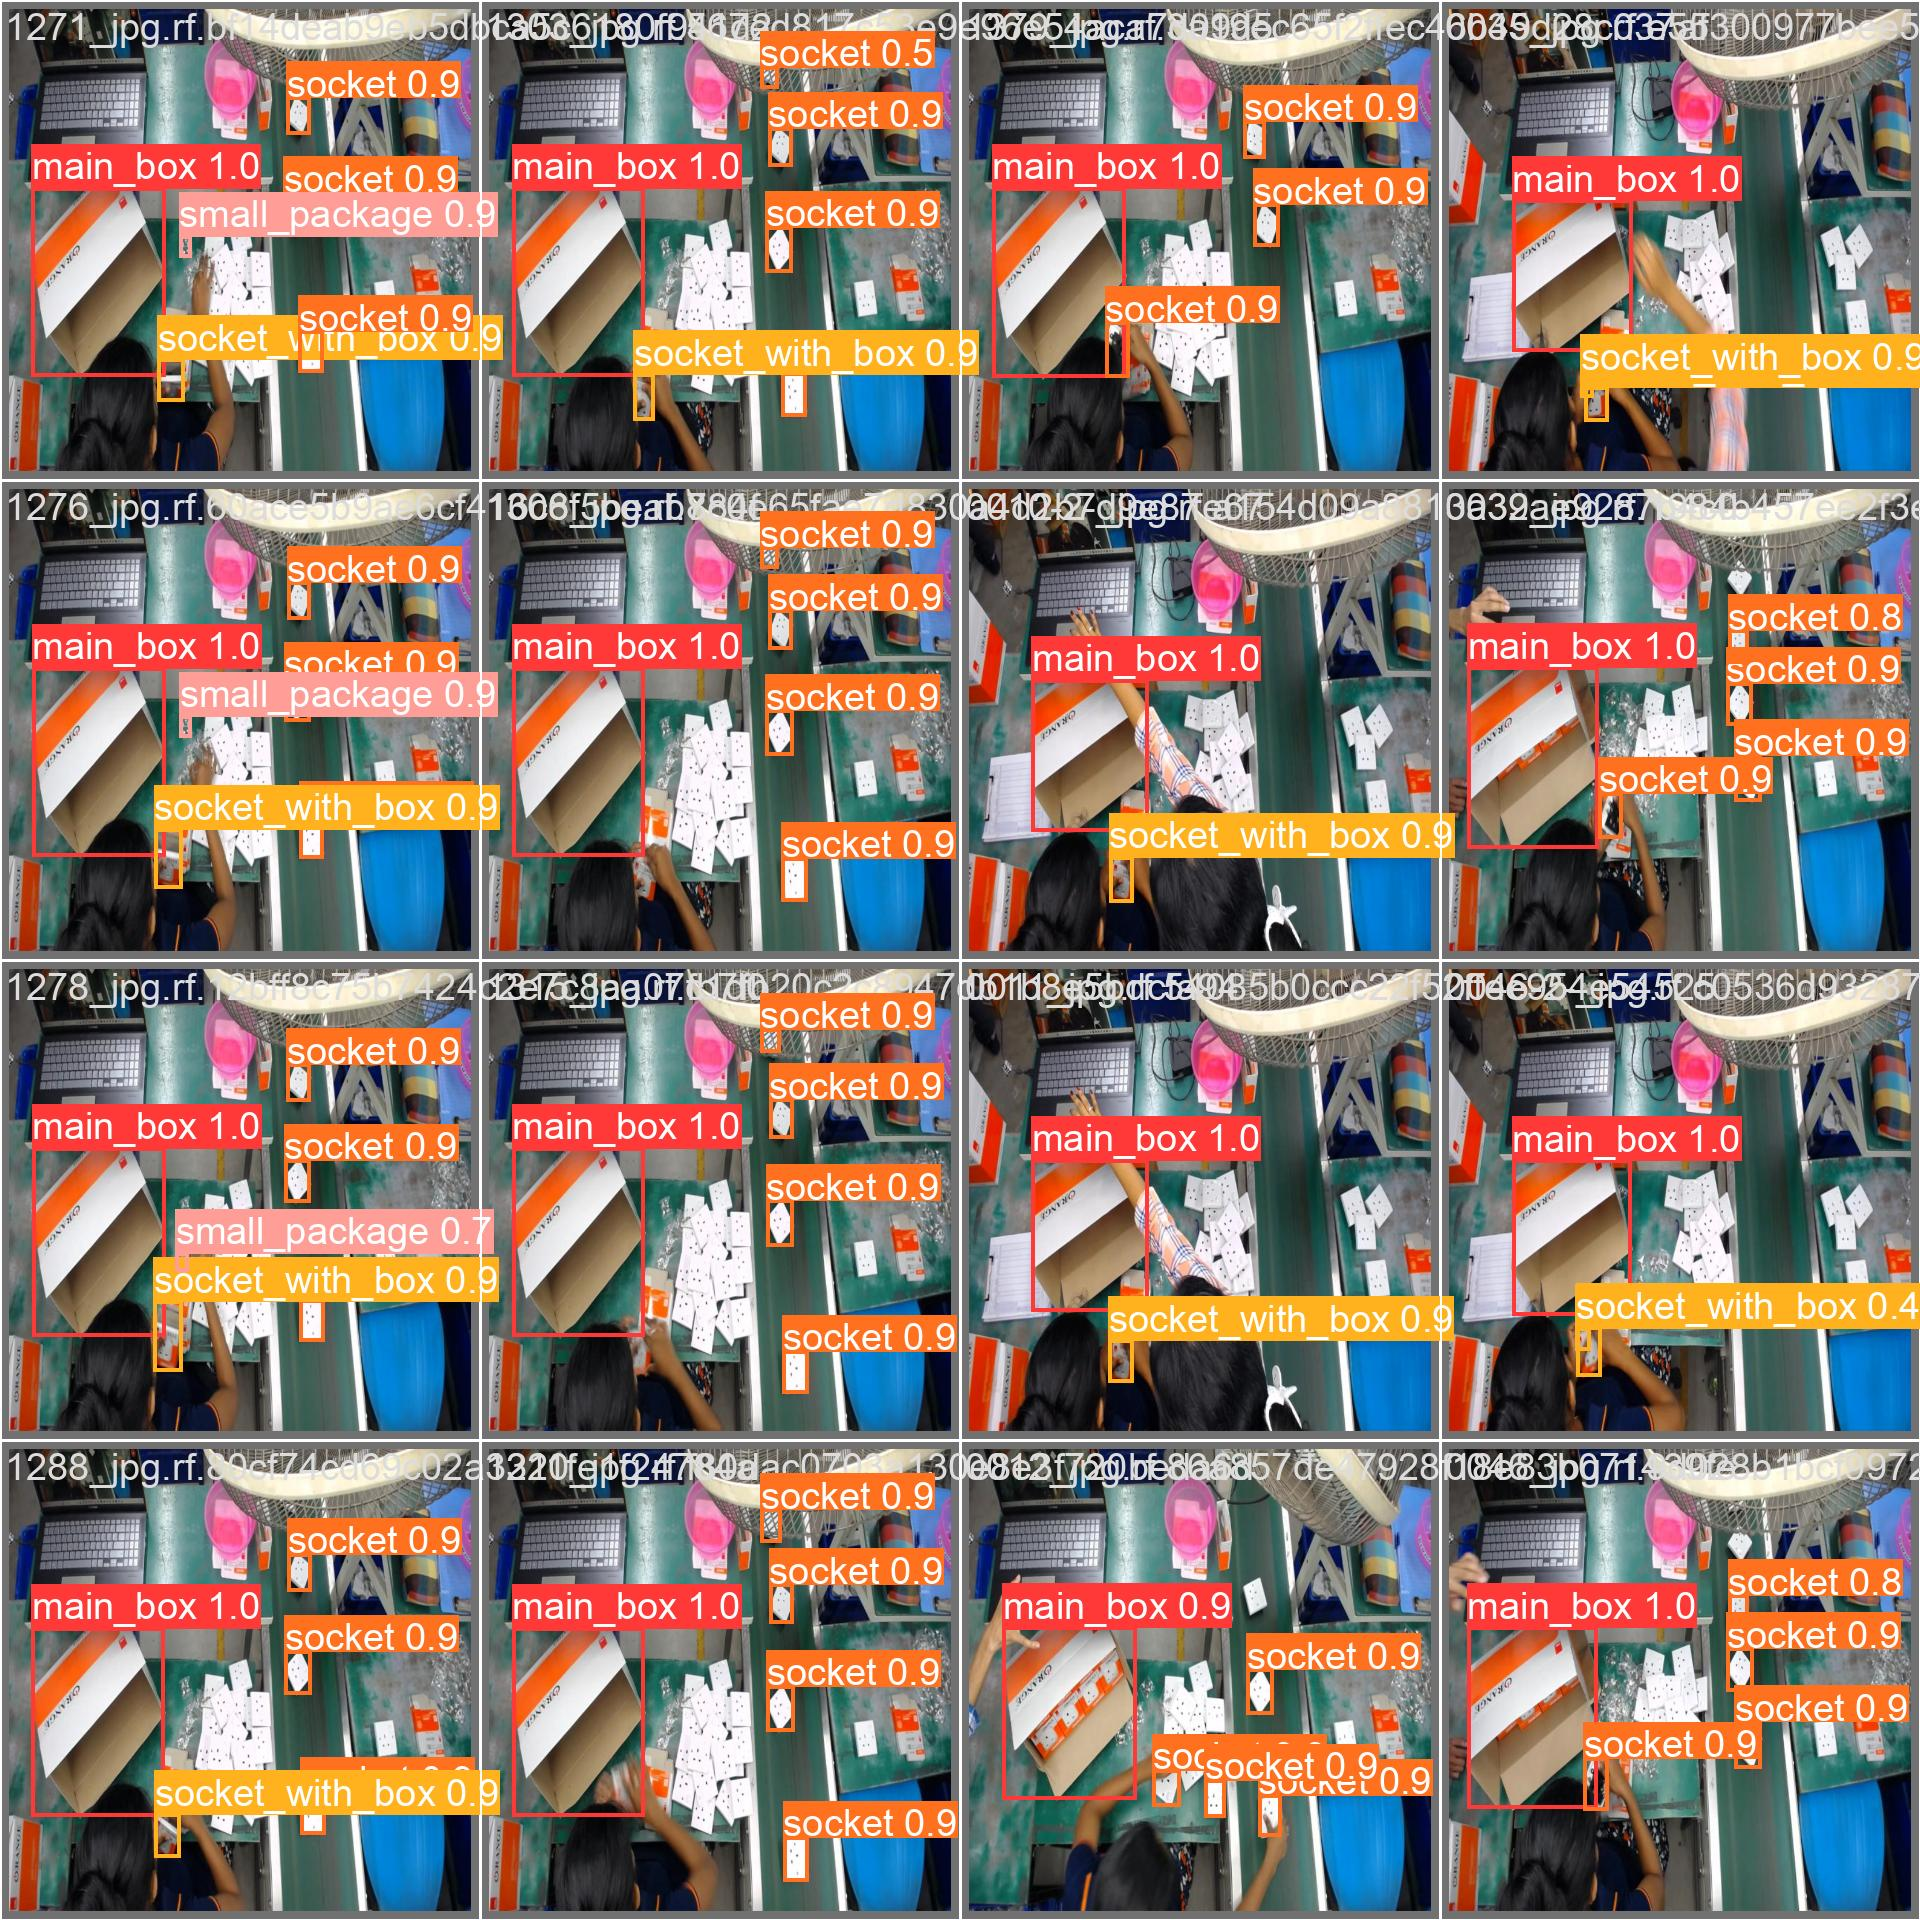

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [16]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43609692 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /kaggle/working/datasets/socket_detection-4/valid/labels.cache... 
val: WARNING ⚠️ /kaggle/working/datasets/socket_detection-4/valid/images/1176_jpg.rf.e54d62c221408babf4107fdd28813bfa.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         81        336       0.95      0.907      0.944      0.871
              main_box         81         81      0.974      0.988      0.987      0.977
         small_package         81         10      0.971        0.8      0.871      0.754
                socket         81        203      0.939      0.911      0.964      0.912
       socket_with_box         81         42      0.914      0.929      0.953      0.843
Speed: 4.8ms preprocess, 59.8ms inference, 0.0ms loss, 16.7ms p

## Inference with Custom Model

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43609692 parameters, 0 gradients, 164.8 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/40 /kaggle/working/datasets/socket_detection-4/test/images/0037-2-_jpg.rf.f25be13280875d8a312c223b993ad05a.jpg: 800x800 1 main_box, 2 socket_with_boxs, 88.0ms
image 2/40 /kaggle/working/datasets/socket_detection-4/test/images/0040_jpg.rf.48b68580191e9496254434d725c0c9f3.jpg: 800x800 1 main_box, 2 socket_with_boxs, 60.0ms
image 3/40 /kaggle/working/datasets/socket_detection-4/test/images/0047_jpg.rf.9b9c2590ccf78dedd974cbe4c1aa7706.jpg: 800x800 1 main_box, 2 socket_with_boxs, 60.9ms
image 4/40 /kaggle/working/datasets/socket_detection-4/test/images/0053_jpg.rf.2c9f6c9f0793268e321bc8ba1b613bd6.jpg: 800x800 1 main_box, 61.2ms
image 5/40 /kaggle/working/datasets/socket_detection-4/test/images/0057_jpg.rf.1a37f861e12b7d652ecfffca9dab38c1.jpg: 800x800 1 main_box, 4

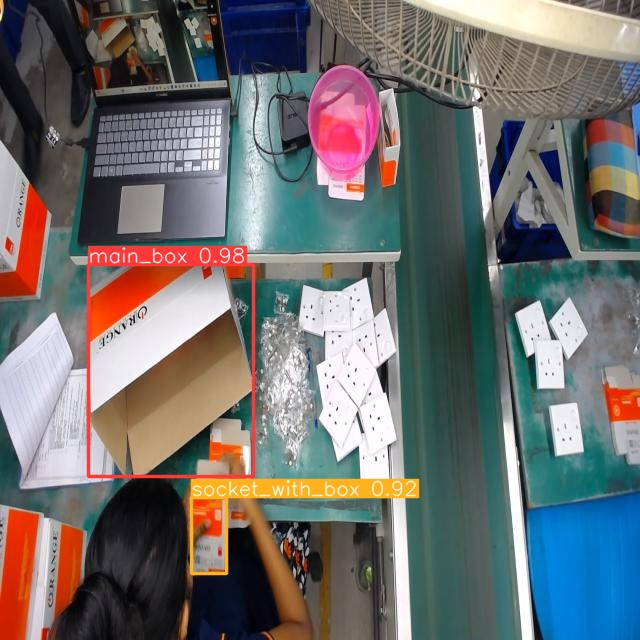

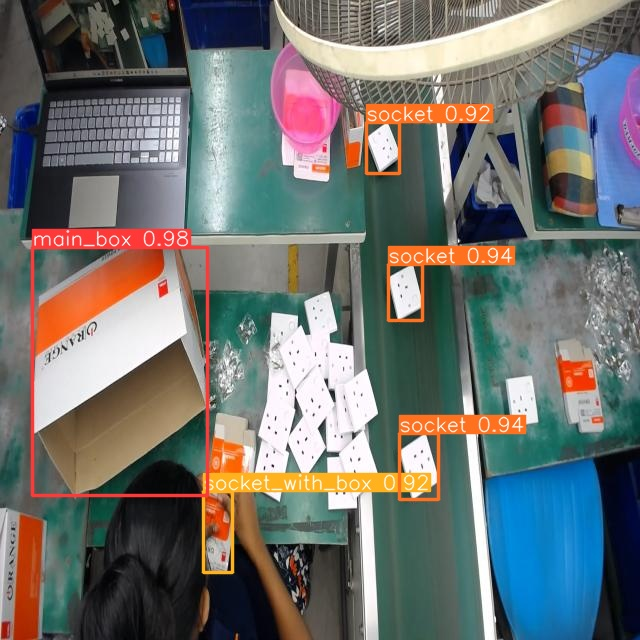

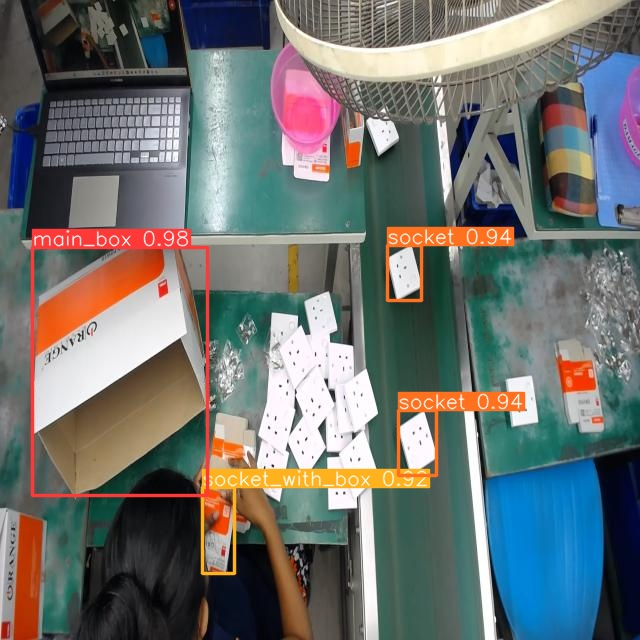

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Save Files

In [24]:
%cd {HOME}/runs/detect/train/
!ls

/kaggle/working/runs/detect/train
F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
P_curve.png					   train_batch4860.jpg
R_curve.png					   train_batch4861.jpg
args.yaml					   train_batch4862.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1708005011.4495d25b8245.117.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


In [26]:
from tqdm import tqdm
import zipfile

def zip_dir(directory, zip_filename):
    files = os.listdir(directory)
    
    progress = tqdm(total=len(files), desc="Zipping")
    
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        
        for file in files:
            zipf.write(os.path.join(directory, file), arcname=file)
            progress.update(1)
    progress.close()

directory_to_zip = '/kaggle/working/runs/detect/train/'
zip_filename = '/kaggle/working/train_out.zip'

zip_dir(directory_to_zip, zip_filename)

directory_to_zip_2 = '/kaggle/working/runs/detect/train/weights/'
zip_filename_2 = '/kaggle/working/train_weights_out.zip'

zip_dir(directory_to_zip_2, zip_filename_2)

Zipping: 100%|██████████| 25/25 [00:00<00:00, 55.01it/s]


In [28]:
%cd {HOME}

/kaggle/working


In [29]:
from IPython.display import FileLink
FileLink(r'train_out.zip')

/kaggle/working/train_out.zip

In [ ]:
FileLink(r'train_weights_out.zip')